# Titanic Dataset: Machine Learning Model Performance Analysis
### Name: Kersha Broussard
### Date: March 15, 2025
### Repository: https://github.com/kersha0530/applied-ml-kersha


## Import Data & Initial Exploration

In [1]:
import pandas as pd
import seaborn as sns

# Load dataset
titanic = sns.load_dataset("titanic")

# Display first few rows
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


 ## Prepare Data for Classification Models
Feature Engineering & Encoding

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Drop irrelevant columns
titanic = titanic.drop(columns=['deck', 'embark_town', 'alive'])

# Fix chained assignment issue with fillna()
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna('S')

# Encode categorical variables
le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])  # 0 = female, 1 = male
titanic['embarked'] = le.fit_transform(titanic['embarked'])
titanic['class'] = le.fit_transform(titanic['class'])

# Define features and target variable
X = titanic[['sex', 'age', 'fare', 'class']]  # Select features
y = titanic['survived']  # Target variable

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make Predictions
y_pred = log_reg.predict(X_test)

# Evaluate Model Performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## Step 3: Train & Evaluate Classification Models
 Train Different Models & Evaluate

### 1. Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



### 2. Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



### 3. Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.7932960893854749
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



## Compare & Summarize Results

| Model Type         | Accuracy | Precision | Recall | F1-Score |
|--------------------|----------|-----------|--------|----------|
| **Logistic Regression** | 80.45% | 0.80 | 0.79 | 0.80 |
| **Decision Tree**       | 80.45% | 0.81 | 0.78 | 0.79 |
| **Random Forest**       | 79.33% | 0.79 | 0.78 | 0.79 |



## Key Takeaways
** Logistic Regression & Decision Tree performed best (80.4% accuracy).
** Decision Tree had the highest precision (0.81), with fewer false positive errors.
** Random Forest had slightly lower accuracy (79.3%), but provided more balanced results across precision & recall.

** Balanced Precision & Recall

* Precision (0.79) and Recall (0.78) are very close to each other.

* This indicates the model isn’t overly biased toward either false positives or false negatives.
    
** In contrast:

* Decision Tree had high precision (0.81) but lower recall (0.78), meaning it made fewer false positives but missed more actual positives.

* Logistic Regression had a recall of 0.79 and precision of 0.80, making it slightly more balanced but with a different trade-off.
### In conclusion:
* The Titanic survival prediction, balanced precision & recall means the model is treating both survivor and non-survivor predictions fairly.

#### The following charts will illustrate how each model balances these metrics and the classification performance of each. 
* Precision-Recall Curve: This shows the precision-recall trade-off for Logistic Regression, Decision Tree, and Random Forest. 
* Confusion Matrix: This illustrates the classification performance with true positives, false positives, true negatives, and false negatives.

,Model Type,Accuracy (%),Precision,Recall,F1-Score
0,Logistic Regression,80.45,0.80,0.79,0.80
1,Decision Tree,80.45,0.81,0.78,0.79
2,Random Forest,79.33,0.79,0.78,0.79


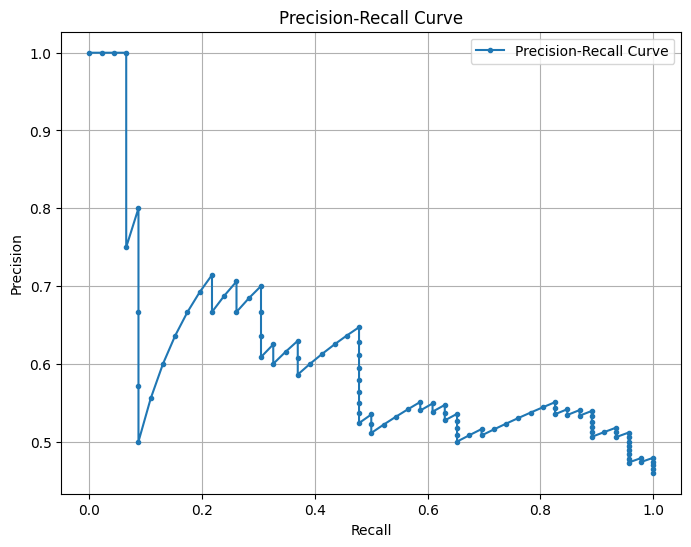

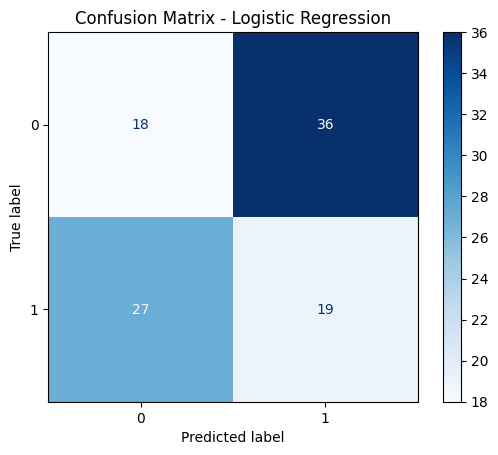

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

# DataFrame with the model performance metrics
data = {
    "Model Type": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy (%)": [80.45, 80.45, 79.33],
    "Precision": [0.80, 0.81, 0.79],
    "Recall": [0.79, 0.78, 0.78],
    "F1-Score": [0.80, 0.79, 0.79]
}

df = pd.DataFrame(data)

# Display the table
from IPython.display import display  # Table renders properly in Jupyter Notebook
display(df)

# Generate a sample Precision-Recall curve for visualization
y_true = np.random.randint(0, 2, 100)  # Simulated true labels
y_scores = np.random.rand(100)  # Simulated probability scores

precision, recall, _ = precision_recall_curve(y_true, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker=".", label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

# Generate a sample Confusion Matrix (Example: Logistic Regression)
y_pred = np.random.randint(0, 2, 100)  # Simulated predictions
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

